In [1]:
from pymatgen.analysis.phase_diagram import PhaseDiagram
from pynter.tools.utils import get_object_from_json

In [2]:
phase_diagram = get_object_from_json(PhaseDiagram,'./data/PD_Na-Nb-O.json')
phase_diagram

Na-Nb-O phase diagram
18 stable phases: 
Na, O2, Nb12O29, NaO2, NbO, Na2O2, Na2O, Na3NbO4, NaNb10O18, NaNbO3, NaNbO2, Na5NbO5, NbO2, Nb2O5, NaNb3O8, NaNb13O33, Nb, Na2Nb3O6

In [3]:
from pymatgen.core.composition import Composition
from pynter.phase_diagram.chempots import PDHandler

<module 'matplotlib.pyplot' from '/nfshome/villa/miniconda3/envs/recent/lib/python3.11/site-packages/matplotlib/pyplot.py'>

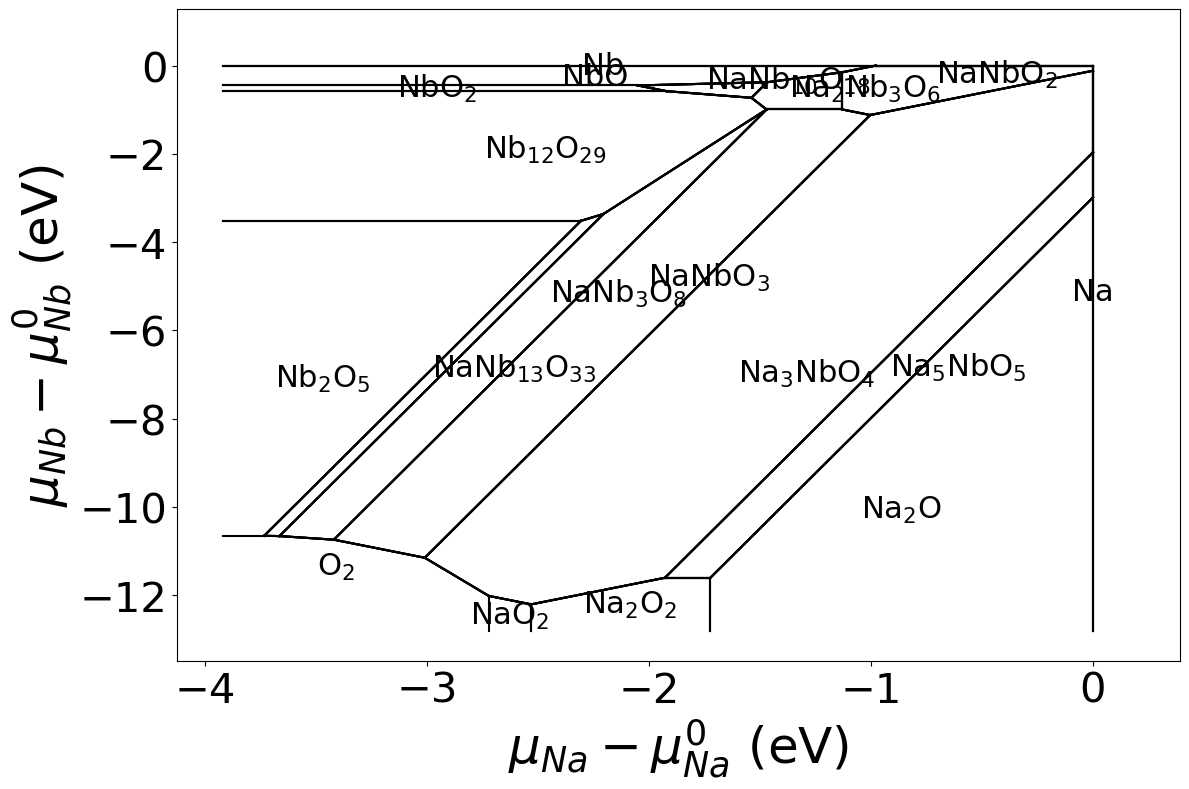

In [4]:
pdhandler = PDHandler(phase_diagram)
pdhandler.get_stability_diagram(elements=['Na','Nb'])

In [5]:
all_chempots = pdhandler.get_all_boundaries_chempots(Composition('NaNbO3'))

In [6]:
from pynter.phase_diagram.chempots import Chempots, Reservoirs

reservoirs_dict = {}

reservoirs_dict['A'] = all_chempots['NaNb3O8-Na2Nb3O6-NaNbO3']
reservoirs_dict['B'] = all_chempots['Na3NbO4-NaNbO3-NaNbO2']
reservoirs_dict['C'] = all_chempots['Na3NbO4-NaNbO3-O2']
reservoirs_dict['D'] = all_chempots['NaNb3O8-NaNbO3-O2']

reservoirs = Reservoirs(res_dict=reservoirs_dict,phase_diagram=phase_diagram,are_chempots_delta=False)
reservoirs.get_dataframe()

,Na,Nb,O
A,-2.782759,-11.095989,-8.848088
B,-2.316050,-11.222276,-8.961562
C,-4.322853,-21.256292,-4.947955
D,-4.732825,-20.846320,-4.947955


In [7]:
from pynter.phase_diagram.thermodynamics import OxygenPressure
import numpy as np

mu_O_referenced = OxygenPressure().get_oxygen_chempot_from_pO2(temperature=1633,partial_pressure=0.2)
chempots_ambient_pressure = {}

boundaries = pdhandler.get_phase_boundaries_chempots(Composition('NaNbO3'),{'O':mu_O_referenced})
for element in boundaries[list(boundaries.keys())[0]]:
    value = np.mean([v[element] for v in boundaries.values()]).item()
    chempots_ambient_pressure[element] = value

chempots_ambient_pressure = Chempots(chempots_ambient_pressure).get_absolute(reservoirs.mu_refs)

reservoirs.res_dict['X'] = chempots_ambient_pressure
reservoirs.get_dataframe()

,Na,Nb,O
A,-2.782759,-11.095989,-8.848088
B,-2.316050,-11.222276,-8.961562
C,-4.322853,-21.256292,-4.947955
D,-4.732825,-20.846320,-4.947955
X,-3.567127,-16.247745,-6.869380


<module 'matplotlib.pyplot' from '/nfshome/villa/miniconda3/envs/recent/lib/python3.11/site-packages/matplotlib/pyplot.py'>

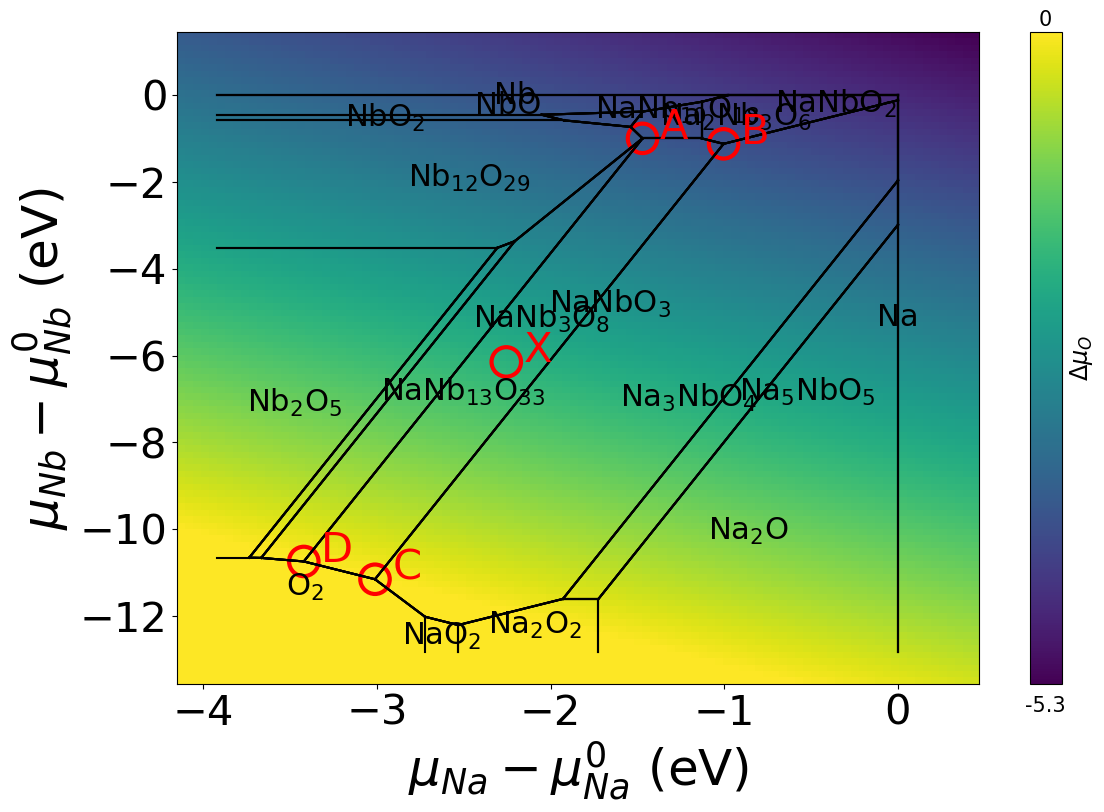

In [8]:
from pynter.phase_diagram.plotter import PDPlotterAdder
import matplotlib.pyplot as plt

plotter = PDPlotterAdder(phase_diagram)

pdhandler.get_stability_diagram(['Na','Nb'])

plotter.add_heatmap(Composition('NaNbO3'),elements=['Na','Nb'])

reservoirs_referenced = reservoirs.copy()
reservoirs_referenced.set_to_referenced()
plotter.add_reservoirs(reservoirs=reservoirs_referenced,elements=['Na','Nb'],edgecolor='red',label_color='red')

In [9]:
reservoirs.to_json('./data/reservoirs.json')